In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [3]:
# Define the path to your dataset.
# The `image_dataset_from_directory` function expects a specific folder structure.
# Example structure:
# dataset_dir/
#   train/
#     cats/
#     dogs/
#   validation/
#     cats/
#     dogs/
from google.colab import drive
drive.mount('/content/drive')
dataset_dir = '/content/drive/MyDrive/PetImages'

ValueError: mount failed

In [ ]:
# --- Step 1: Set up Data Loading Parameters ---
# Define the dimensions for your images. All images will be resized to this size.
image_size = (180, 180)

# Define the batch size. This is the number of images the network will process
# at a time during training.
batch_size = 16
validation_split = 0.2  # 20% data for validation
seed = 42

In [ ]:
# --- Step 2: Load the Dataset ---

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'  # For binary classification (cats vs. dogs)
).take(10)  # Take only 10 batches for fast execution

validation_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'
).take(5)  # Take only 5 batches for validation

# class_names = train_ds.class_names

Found 25051 files belonging to 2 classes.
Using 20041 files for training.
Found 25051 files belonging to 2 classes.
Using 5010 files for validation.


In [ ]:
# --- Step 3: Design the Convolutional Neural Network (CNN) ---

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,105 (25.36 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Step 4: Compile the Model ---

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# --- Step 5: Train the Model ---

epochs = 5
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5276 - loss: 76.6108 - val_accuracy: 0.5875 - val_loss: 1.4307
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6296 - loss: 0.9028 - val_accuracy: 0.6000 - val_loss: 0.7410
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8208 - loss: 0.5129 - val_accuracy: 0.6125 - val_loss: 0.6749
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8823 - loss: 0.3057 - val_accuracy: 0.6000 - val_loss: 0.8616
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9142 - loss: 0.2047 - val_accuracy: 0.6000 - val_loss: 1.0353


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

NameError: name 'model' is not defined

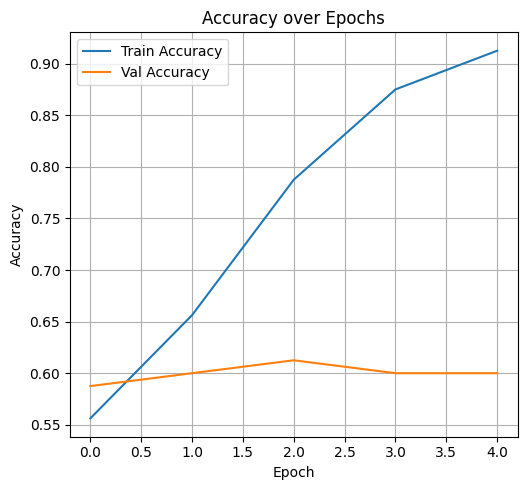

In [ ]:
# --- Step 6: Plot Accuracy and Loss ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()